In [1]:
# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code, date): 
  urllist= []
  for i in range(1, page_num + 1):
    url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)   
    news = requests.get(url)
    

    # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
    soup = BeautifulSoup(news.content, 'html.parser')

    # CASE 1
    news_list = soup.select('.newsflash_body .type06_headline li dl')
    
    # CASE 2
    news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
    # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
    for line in news_list:
        urllist.append(line.a.get('href'))
  return urllist

url_list = make_urllist(2, 101, 20200506)
print('뉴스 기사의 개수: ',len(url_list))
url_list[:5]

뉴스 기사의 개수:  40


['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451723',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451721',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451718',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0009849190',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451717']

In [2]:
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

In [3]:
from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다.
def make_data(urllist, code):
  text_list = []
  for url in urllist:
    article = Article(url, language='ko')
    article.download()
    article.parse()
    text_list.append(article.text)
    #print(text_list)


  #- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
  df = pd.DataFrame({'news': text_list})

  #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
  df['code'] = idx2word[str(code)]
  print(str(code))
  return df
 

data = make_data(url_list, 101)
#- 상위 10개만 출력해봅니다.
data[:10]

101


,news,code
0,고려은단이 5월을 맞아 응원 메시지를 공유하는 ‘5월 5글자로 응원 부탁해!’ 이벤...,경제
1,코리아나화장품의 민감성 피부를 위한 저자극 스킨케어 브랜드 '프리엔제'가 마르고 건...,경제
2,서울장수주식회사가 부드럽고 달콤한 맛으로 인기를 모으고 있는 생막걸리 ‘인생막걸리’...,경제
3,[서울=뉴시스] 오동현 기자 = 모바일 게임 기업 컴투스는 3D 모바일 야구 게임 ...,경제
4,대원제약이 2020년 상반기 신입과 경력 정기 공채를 실시합니다.정기 공채 모집분야...,경제
5,"[AFP=연합뉴스] [AFP=연합뉴스]\n\n""요즘은 잔인한 날""…리프트도 앞서 9...",경제
6,이재용 삼성전자 부회장이 6일 삼성전자 서울 서초사옥에서 대국민 사과 회견을 하기 ...,경제
7,JW중외제약이 A형 혈우병 예방요법제 ‘헴리브라피하주사를 출시하고 본격적인 마케팅 ...,경제
8,"옵티팜과 휴벳바이오가 공동 개발중인 백신 후보 물질에 대해 마우스, 기니피그, 미니...",경제
9,[한국경제TV 신동호 기자]\n\n전남 나주시와 충북 청주시가 방사광 가속기 구축사...,경제


In [4]:
code_list = [102, 103, 105]

code_list

[102, 103, 105]

In [5]:
def make_total_data(page_num, code_list, date):
  df = None

  for code in code_list:
    url_list = make_urllist(page_num, code, date)
    df_temp = make_data(url_list, code)
    print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

    if df is not None:
      df = pd.concat([df, df_temp])
    else:
      df = df_temp

  return df

In [6]:
df = make_total_data(1, code_list, 20200506)


102
102번 코드에 대한 데이터를 만들었습니다.
103
103번 코드에 대한 데이터를 만들었습니다.
105
105번 코드에 대한 데이터를 만들었습니다.


In [7]:
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  60


In [8]:
def make_total_data(page_num, code_list, date):
  df = None

  for code in code_list:
    url_list = make_urllist(page_num, code, date)
    df_temp = make_data(url_list, code)
    print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

    df = pd.concat([df, df_temp])

  return df

In [9]:
df = make_total_data(1, code_list, 20200506)


102
102번 코드에 대한 데이터를 만들었습니다.
103
103번 코드에 대한 데이터를 만들었습니다.
105
105번 코드에 대한 데이터를 만들었습니다.


In [ ]:
print('뉴스 기사의 개수: ',len(df))

df.sample(10)

In [ ]:
# 네이버 크롤링 (오래걸림 주의)

#df = make_total_data(3, code_list, 20200506)

In [ ]:
#import os

# 데이터프레임 파일을 csv 파일로 저장합니다.
#csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
#df.to_csv(csv_path, index=False)

#if os.path.exists(csv_path):
#  print('{} File Saved!'.format(csv_path))

In [10]:
import os

csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df1 = pd.read_table(csv_path, sep=',')

csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data2.csv"
df2 = pd.read_table(csv_path, sep=',')

df=df1.append(df2)

print('뉴스 기사의 개수: ',len(df))
df.sample(10)


뉴스 기사의 개수:  8827


,news,code
4550,김연수 한글과컴퓨터그룹 부사장 김연수 한글과컴퓨터그룹 부사장\n\n[Copyrigh...,IT/과학
1693,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,사회
2719,/사진=배우 김혜수가 드라마 '하이에나' 속 정금자 캐릭터를 위해 만든 인스타그램 ...,생활/문화
1342,[부산=뉴시스] 하경민 기자 = 제21대 국회의원 선거일인 15일 오후 부산 수영구...,사회
886,(이천=연합뉴스) 홍기원 기자 = 6일 오후 경기도 이천시 서희청소년문화센터에 마련...,사회
1614,[음성=뉴시스]강신욱 기자 = 21대 총선 충북 증평·진천·음성 선거구에서 당선한 ...,사회
3029,게티이미지뱅크 게티이미지뱅크\n\n[Copyright ⓒ 전자신문 & 전자신문인터넷...,IT/과학
4941,머리를 긁고 있는 오랑우탄. 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이...,IT/과학
1522,[광주CBS 이승훈 기자]\n\n광주시의회 이경호 운영위원장 광주시의회 이경호 운영...,사회
614,- 내달 새 자산기준 분류안 적용 점검\n\n- 지방 사업장 PF대출 부실 등도 대...,경제


In [11]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

0       파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1       동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2       황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3       귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4       서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
                              ...                        
3698    레고켐바이오사이언스대표 김용주사진가 글로벌 기술수출에 또다시 성공했다 년 중국 포순...
3699    제대 국회의원선거 기간 중단됐던 네이버 실시간 급상승 검색어 서비스가 일 오후 시부...
3700    아마존 연합뉴스 자료사진 아마존 연합뉴스 자료사진직원들 코로나 확산 방지 조치 충분...
3701    제대 국회의원선거가 임박한 가운데 투표 및 개표 방송을 준비하는 기업들의 움직임이 ...
3702    롤 점검이 일 진행될 예정이다온라인게임 리그오브레전드이하 롤은 일 오전 시부터 오전...
Name: news, Length: 8827, dtype: object

In [12]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [13]:
# 중복 샘플 제거 전
df.drop_duplicates(subset=['news'], inplace=False)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  8827


In [14]:
# 중복 샘플 제거 후
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  6127


/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home

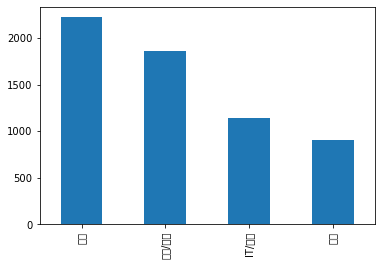

In [15]:
df['code'].value_counts().plot(kind = 'bar')

In [16]:
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학   1138
1     경제    901
2     사회   2222
3  생활/문화   1866


In [17]:
from konlpy.tag import Komoran
tokenizer = Komoran()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

['밤', '에', '귀가', '하', '던', '여성', '에게', '범죄', '를', '시도', '하', 'ㄴ', '대', '남성', '이', '구속', '되', '었', '다', '서울', '제주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '하', '아', '수사', '하', '고', '있', '다고', '일', '밝히', '었', '다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '아', '폭행', '을', '시도', '하', '려다가', '도망가', 'ㄴ', '혐의', '를', '받', '는다', '피하', '아', '여성', '이', '저항', '하', '자', '놀라', 'ㄴ', '씨', '는', '도망가', '았', '으며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '던', '경찰', '에', '체포', '되', '었', '다', '피하', '아', '여성', '은', '이', '과정', '에서', '경미', '하', 'ㄴ', '부상', '을', '입', '은', '것', '으로', '전하', '아', '지', '었', '다']


In [18]:
stopwords = ['에','ㄴ','며','다','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [19]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [20]:
text_data = preprocessing(df['news'])
print(text_data[0])

파주 시청 사진 제공 파주시 파주 시청 사진 제공 파주시 파주 파이낸셜뉴스 강 근 주 파주시 일 관내 취약 계층 만 가구 대하 아 정부 긴급 재난 지원금 입금 완료 았 파주시 민이 받 긴급 재난 지원금 인 이상 가구 기준 으로 만원 받 게 되 인 가구 만원 인 가구 만원 인 가구 만원 이다 정부 발표 긴급 재난 지원금 파주시 민 지급 금액 다른 이유 국비 지방비 부담 비율 이다 파주시 이미 모든 시민 경기도 파주시 재난 기본소득 인당 각 만원 지급 고 어 시민 국비 지원금 만 지급 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만원 경기도 재난 기본소득 만원 정부 긴급 재난 지원금 만원 총 만원 받 게 되 취약 계층 아니 시민 오 월 일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 ㄹ 세대주 가족 지원금 일괄 신청 아야 한편 파주시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태스크포스를 구성 아 긴급 재난 지원금 원활 게 지급 되 ㄹ 도록 지원 ㄴ다 저작권 자 파이낸셜뉴스 재 배포


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [22]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

In [23]:
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

훈련용 뉴스 기사의 개수 : 4595
테스트용 뉴스 기사의 개수 :  1532
훈련용 레이블의 개수 :  4595
테스트용 레이블의 개수 :  1532


In [24]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [25]:
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

In [ ]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

In [ ]:
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

In [ ]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

In [ ]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))